In [1]:

import numpy as np 
import pandas as pd 
import cv2
import os
from zipfile import ZipFile
from tqdm import tqdm
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential



In [2]:
dataset = []
labels = []

In [3]:
def prepare_Images(label,path):
    img=cv2.imread(path,cv2.IMREAD_COLOR)
    img_res=cv2.resize(img,(224,224))
    img_array = img_to_array(img_res)
    img_array = img_array/255.0
    dataset.append(img_array)
    labels.append(str(label))

In [4]:
train_Data = pd.read_csv("../input/aptos2019-blindness-detection/train.csv")
train_Data.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [5]:
id_code_Data = train_Data['id_code']
diagnosis_Data = train_Data['diagnosis']

In [6]:
for id_code,diagnosis in tqdm(zip(id_code_Data,diagnosis_Data)):
    path = os.path.join('../input/aptos2019-blindness-detection/train_images','{}.png'.format(id_code))
    prepare_Images(diagnosis,path)

3662it [07:09,  8.52it/s]


In [7]:
images = np.array(dataset)
label_arr = np.array(labels)

In [8]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(images,label_arr,stratify=label_arr,test_size=0.20,random_state=44)

In [9]:
x_train.shape

(2929, 224, 224, 3)

In [10]:
x_test.shape

(733, 224, 224, 3)

In [11]:
y_train.shape

(2929,)

In [12]:
y_test.shape

(733,)

In [13]:
y_train= np_utils.to_categorical(y_train, num_classes=5)
y_test = np_utils.to_categorical(y_test, num_classes=5)

In [14]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(5,activation="softmax"))
model.summary()

2022-12-27 07:21:48.897801: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       3

In [15]:
import tensorflow
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])
hist = model.fit(x_train,y_train,batch_size=64,epochs=30,verbose=1)

2022-12-27 07:21:52.573967: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
46/46 [==============================] - 29s 595ms/step - loss: 0.9419 - accuracy: 0.6514
Epoch 2/30
46/46 [==============================] - 27s 595ms/step - loss: 0.7703 - accuracy: 0.7228
Epoch 3/30
46/46 [==============================] - 27s 588ms/step - loss: 0.7423 - accuracy: 0.7255
Epoch 4/30
46/46 [==============================] - 27s 595ms/step - loss: 0.7099 - accuracy: 0.7398
Epoch 5/30
46/46 [==============================] - 27s 583ms/step - loss: 0.6855 - accuracy: 0.7429
Epoch 6/30
46/46 [==============================] - 27s 580ms/step - loss: 0.6551 - accuracy: 0.7525
Epoch 7/30
46/46 [==============================] - 27s 590ms/step - loss: 0.6088 - accuracy: 0.7736
Epoch 8/30
46/46 [==============================] - 27s 591ms/step - loss: 0.5719 - accuracy: 0.7822
Epoch 9/30
46/46 [==============================] - 27s 585ms/step - loss: 0.5317 - accuracy: 0.8030
Epoch 10/30
46/46 [==============================] - 27s 583ms/step - loss: 0.4866 - accura

In [16]:
pred = model.predict(x_test)

In [17]:
model.evaluate(x_test,y_test)

23/23 [==============================] - 2s 73ms/step - loss: 1.2823 - accuracy: 0.7517


[1.2822548151016235, 0.7517053484916687]

In [18]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
score = round(accuracy_score(y_test.argmax(axis=1), pred.argmax(axis=1)),2)
print(score)


0.75


In [19]:

report = classification_report(y_test.argmax(axis=1), pred.argmax(axis=1))
print(report)


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       361
           1       0.48      0.45      0.46        74
           2       0.64      0.69      0.66       200
           3       0.47      0.23      0.31        39
           4       0.40      0.39      0.39        59

    accuracy                           0.75       733
   macro avg       0.58      0.54      0.56       733
weighted avg       0.74      0.75      0.74       733



In [20]:
conMat = confusion_matrix(y_test.argmax(axis=1),pred.argmax(axis=1))
print(conMat)

[[348   7   6   0   0]
 [  9  33  23   1   8]
 [ 12  21 138   6  23]
 [  1   1  24   9   4]
 [  0   7  26   3  23]]


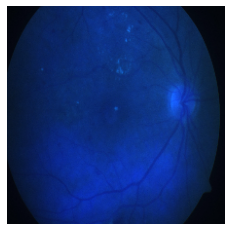

In [21]:
plt.axis('off')
plt.imshow(x_train[0])

In [22]:
y_train[0]

array([0., 0., 1., 0., 0.], dtype=float32)